<a href="https://colab.research.google.com/github/siva-netizen/yolov8--coconut_maturity_lvl/blob/main/yolo%5Bcoconut%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install ultralytics roboflow opencv-python torch torchvision numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [ ]:

# Import required libraries
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Initialize Roboflow and download dataset
rf = Roboflow(api_key="V6l7eBqVkekBX5xgVvna")
project = rf.workspace("college-if44x").project("on-tree-mature-coconut-fruit-detection")
version = project.version(1)
dataset = version.download("yolov8")
dataset_path = dataset.location

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to On-tree-mature-coconut-fruit-detection-1 in yolov8:: 100%|██████████| 548/548 [00:00<00:00, 3554.65it/s]


In [ ]:
# Data augmentation
augmentation = {
    "flipud": 0.5,  # Vertical flip probability
    "fliplr": 0.5,  # Horizontal flip probability
    "mosaic": 1.0,  # Mosaic augmentation
    "mixup": 0.2,   # Mixup augmentation
    "hsv_h": 0.015,  # Hue shift
    "hsv_s": 0.7,    # Saturation shift
    "hsv_v": 0.4     # Value (brightness) shift
}


In [ ]:
# Train YOLOv8 model
model = YOLO("yolov8n.yaml")  # Choose 'n', 's', 'm', or 'l' based on your needs

model.train(
    data=os.path.join(dataset_path, "data.yaml"),
    epochs=100,       # Increased for better training
    batch=16,         # Keep batch size
    imgsz=640,        # Image size
    device=device,
    name="coconut_maturity_model",
    lr0=0.01,         # Initial learning rate
    lrf=0.0001,       # Final learning rate
    weight_decay=0.0005,  # Regularization
    patience=10,      # Early stopping patience
    dropout=0.2,      # Prevent overfitting
    augment=True      # Enable augmentations
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=coconut_maturity_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/On-tree-mature-coconut-fruit-detection-1/train/labels... 187 images, 17 backgrounds, 0 corrupt: 100%|██████████| 187/187 [00:00<00:00, 1449.32it/s]

train: New cache created: /content/On-tree-mature-coconut-fruit-detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/On-tree-mature-coconut-fruit-detection-1/valid/labels... 53 images, 2 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 565.10it/s]

val: New cache created: /content/On-tree-mature-coconut-fruit-detection-1/valid/labels.cache


Plotting labels to runs/detect/coconut_maturity_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/coconut_maturity_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.67G      3.562      4.261      4.202        134        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         53        559   0.000681      0.014   0.000395   0.000117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.27G      3.538      4.153      4.143        143        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         53        559   0.000821     0.0204   0.000471    0.00013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.3G      3.516      4.021      4.077        177        640: 100%|██████████| 12/12 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         53        559   0.000789     0.0183   0.000452   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.33G       3.51      3.768      3.946        149        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         53        559    0.00141     0.0326    0.00105   0.000315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.54G      3.329      3.583       3.77        100        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         53        559    0.00042     0.0102   0.000279   0.000125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.37G      3.107      3.407        3.6        121        640: 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         53        559    0.00197     0.0958    0.00235   0.000683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.4G      2.985      3.383      3.473        161        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         53        559    0.00771      0.151    0.00495    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.44G      2.863      3.327      3.355        197        640: 100%|██████████| 12/12 [00:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         53        559    0.00244     0.0907    0.00189   0.000622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.37G      2.782      3.217      3.168        159        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         53        559      0.669     0.0673    0.00226   0.000623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.62G      2.703      3.152      3.057        159        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         53        559    0.00576     0.0965    0.00412    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.56G       2.68      3.151      2.985        126        640: 100%|██████████| 12/12 [00:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         53        559     0.0117      0.326     0.0119    0.00433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.39G      2.578      3.046      2.893        143        640: 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         53        559     0.0343     0.0497     0.0133    0.00462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G      2.494      2.989      2.819         99        640: 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         53        559     0.0446     0.0773     0.0236    0.00919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.29G      2.455      2.961      2.737        118        640: 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         53        559      0.507     0.0722     0.0729     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.33G      2.421       2.85      2.699        198        640: 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         53        559      0.262      0.139     0.0746     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.56G      2.362      2.826      2.578        189        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         53        559      0.162      0.131     0.0879     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.39G      2.321      2.729      2.586        140        640: 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all         53        559      0.136       0.26      0.124     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.22G      2.278      2.708      2.492        176        640: 100%|██████████| 12/12 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         53        559      0.125       0.18     0.0844     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.31G      2.164      2.604      2.453        100        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         53        559      0.204       0.29      0.174     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.61G      2.124      2.431      2.359        142        640: 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         53        559      0.277       0.27      0.182     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.27G      2.138      2.598      2.376        169        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         53        559      0.233      0.277      0.173     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.29G      2.077      2.541       2.36        147        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         53        559      0.315      0.251      0.213      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.45G      2.053      2.456      2.296        108        640: 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         53        559      0.279      0.335       0.25      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.47G          2        2.4      2.287        170        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         53        559      0.253      0.315      0.226      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.33G      1.943      2.378      2.206        152        640: 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         53        559      0.286      0.318      0.255      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.45G      1.932      2.339      2.171        144        640: 100%|██████████| 12/12 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         53        559      0.285      0.342      0.258      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G      1.945      2.411       2.21        100        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         53        559       0.38      0.316       0.27      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.42G      1.893      2.304      2.144        155        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         53        559      0.394      0.339      0.272      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.51G      1.915      2.272      2.145        212        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         53        559      0.322      0.336      0.285      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.44G      1.853      2.276      2.097        148        640: 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all         53        559      0.285      0.349      0.274      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.35G      1.861      2.315      2.126         81        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         53        559      0.352       0.34      0.283      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.33G      1.841       2.21      2.093        123        640: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         53        559      0.394       0.33        0.3      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G      1.771      2.172      2.059        173        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         53        559      0.351      0.344      0.261      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.27G      1.766      2.173      2.026        139        640: 100%|██████████| 12/12 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         53        559      0.348      0.353      0.305       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.37G      1.798      2.137      2.031        193        640: 100%|██████████| 12/12 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         53        559       0.33       0.35       0.27      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.36G      1.797      2.104      1.987        151        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         53        559      0.364       0.37      0.303      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.55G      1.758      2.181      2.028        137        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         53        559      0.356      0.331      0.292      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.35G      1.744      2.128      1.973        102        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         53        559      0.338      0.367      0.289      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.35G      1.705          2      1.932        143        640: 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         53        559      0.336      0.382      0.299      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.19G      1.733      2.111      1.954        166        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         53        559      0.394      0.365      0.334      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.27G      1.682      2.058      1.926        157        640: 100%|██████████| 12/12 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         53        559      0.346      0.383       0.35        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.43G      1.689      2.014      1.919        175        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         53        559      0.331      0.368      0.315      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.44G      1.608      2.026      1.879        215        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         53        559      0.356      0.415      0.349      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.54G      1.625      1.998      1.863        122        640: 100%|██████████| 12/12 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         53        559      0.353      0.398       0.34      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.43G      1.637      1.985      1.893        172        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         53        559      0.402      0.387      0.375      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.47G      1.612      1.966      1.841        170        640: 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         53        559       0.39      0.382      0.336      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.64G      1.663      1.947      1.853        133        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         53        559      0.397      0.455      0.384      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.55G       1.63      1.952      1.862        132        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         53        559      0.377      0.393      0.327      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.25G      1.575      1.914      1.828        193        640: 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         53        559      0.468       0.37      0.354      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.29G      1.582      1.904      1.796        107        640: 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         53        559      0.372      0.351      0.321      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.47G      1.589      1.919       1.81        119        640: 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         53        559      0.363      0.357      0.347      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.3G      1.607       1.89      1.827        163        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         53        559      0.397      0.375      0.373      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G      1.588       1.88      1.819        133        640: 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         53        559      0.426      0.409      0.387      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.28G      1.562      1.841       1.78        129        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         53        559       0.41      0.401      0.375      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.35G      1.557      1.928      1.802        220        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         53        559      0.404      0.385      0.351      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.45G      1.577       1.86      1.778        210        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         53        559      0.365      0.447      0.392      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.46G      1.563      1.803      1.773        143        640: 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         53        559      0.462      0.399      0.384       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.35G      1.545        1.9      1.797        108        640: 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         53        559       0.43      0.377      0.347      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.23G      1.562      1.845      1.775        196        640: 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         53        559      0.425      0.426      0.392      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.32G       1.53      1.873      1.789        146        640: 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         53        559      0.423      0.432      0.408      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.47G      1.539      1.823      1.732        161        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         53        559      0.409      0.455      0.414      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.41G      1.566      1.859      1.773        194        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         53        559      0.427      0.422      0.394      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.43G      1.563      1.847      1.752        140        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         53        559       0.42      0.429        0.4      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.29G      1.494      1.811        1.7        151        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         53        559       0.35       0.44      0.358      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.32G      1.539      1.828      1.775        162        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         53        559      0.417      0.419      0.392      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.35G      1.478      1.714      1.684        219        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         53        559      0.395      0.506      0.425      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.3G      1.486      1.781      1.717        159        640: 100%|██████████| 12/12 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         53        559      0.433      0.438      0.394      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.33G       1.47      1.732      1.706        152        640: 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         53        559      0.437      0.436      0.372      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.35G      1.498      1.835       1.74        142        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         53        559      0.457      0.479      0.413      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.34G      1.461       1.76      1.707        150        640: 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         53        559      0.444      0.484      0.436      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.27G      1.467      1.737      1.714        151        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         53        559      0.413      0.467      0.435      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.33G      1.469      1.714      1.697        216        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         53        559      0.446      0.404      0.396      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.38G      1.504      1.733      1.743        149        640: 100%|██████████| 12/12 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         53        559      0.441       0.46      0.436      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.6G      1.449      1.688      1.662        161        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         53        559      0.495      0.443      0.444      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.28G      1.445       1.65      1.669        216        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         53        559       0.48      0.451      0.449      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.48G       1.49      1.751      1.726        151        640: 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         53        559      0.413      0.479      0.423      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.45G      1.464      1.689      1.702        120        640: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         53        559      0.444      0.479      0.426      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.43G      1.424      1.684      1.661        155        640: 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         53        559      0.485      0.409       0.42      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.29G      1.448      1.704      1.667        221        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         53        559      0.462      0.454      0.444      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.46G      1.457      1.697      1.695         85        640: 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         53        559      0.502      0.431      0.441      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.27G      1.442      1.658      1.668        146        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         53        559      0.525      0.435      0.441       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.31G       1.43      1.689      1.647        193        640: 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         53        559      0.418      0.449      0.392      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.56G      1.452       1.64      1.655        156        640: 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         53        559      0.443      0.524      0.459       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.45G      1.415      1.626      1.635        250        640: 100%|██████████| 12/12 [00:05<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         53        559      0.498      0.493      0.476      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.3G      1.399      1.602      1.639        151        640: 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         53        559       0.49      0.477      0.463      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.73G      1.411      1.605      1.627        158        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         53        559      0.496      0.455      0.458      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.32G      1.413      1.594      1.651        166        640: 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         53        559      0.508      0.499      0.474      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.46G      1.376      1.583      1.599        188        640: 100%|██████████| 12/12 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         53        559      0.534      0.486      0.478      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.44G      1.398      1.576       1.63        125        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         53        559      0.497      0.488      0.468      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.34G      1.364      1.564      1.608        145        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         53        559      0.476      0.505      0.471      0.298


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.24G       1.33      1.672      1.633        109        640: 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         53        559      0.521       0.43       0.46      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.24G      1.302      1.607      1.569        131        640: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         53        559      0.563      0.423      0.468       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G       1.32      1.607      1.569        103        640: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         53        559       0.55      0.453      0.486      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.23G      1.299      1.573      1.597         79        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         53        559      0.523      0.479      0.486      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.19G      1.278      1.544      1.569         98        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         53        559      0.516      0.493      0.489      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.16G      1.293      1.569      1.578         72        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         53        559      0.541      0.474      0.489      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.24G      1.296      1.569      1.601         87        640: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         53        559      0.537      0.495       0.49      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.23G      1.255      1.492      1.561         71        640: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         53        559      0.528      0.503      0.489      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.19G      1.279      1.462      1.547         98        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         53        559      0.553      0.484      0.487       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.24G      1.259      1.531      1.547         85        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         53        559      0.531      0.498      0.486       0.31



100 epochs completed in 0.216 hours.
Optimizer stripped from runs/detect/coconut_maturity_model/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/coconut_maturity_model/weights/best.pt, 6.3MB

Validating runs/detect/coconut_maturity_model/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


                   all         53        559      0.555      0.513      0.515      0.329
                stage1         31        135      0.385      0.259      0.216      0.121
                stage2         40        327      0.627      0.621      0.647      0.436
                stage3         17         97      0.651       0.66      0.683      0.429
Speed: 0.2ms preprocess, 13.3ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/coconut_maturity_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0c1b8b99d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Evaluate the model
metrics = model.val()
print("Evaluation Metrics:", metrics)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/On-tree-mature-coconut-fruit-detection-1/valid/labels.cache... 53 images, 2 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


                   all         53        559      0.555      0.514      0.516      0.329
                stage1         31        135      0.387      0.259      0.216      0.121
                stage2         40        327      0.627      0.622      0.648      0.434
                stage3         17         97      0.652       0.66      0.682      0.431
Speed: 12.9ms preprocess, 30.9ms inference, 0.0ms loss, 10.6ms postprocess per image
Results saved to runs/detect/coconut_maturity_model2
Evaluation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0c1c461390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,  

In [ ]:
# Extract evaluation metrics correctly
precision = metrics.box.map50    # mAP@50
recall = metrics.box.map         # mAP@50-95 (average precision)
map50 = metrics.box.mp           # Mean precision
map50_95 = metrics.box.mr        # Mean recall

# Display evaluation results
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
print(f"mAP@50: {map50:.4f}, mAP@50-95: {map50_95:.4f}")


Precision: 0.5155, Recall: 0.3287
mAP@50: 0.5552, mAP@50-95: 0.5136



image 1/1 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00003_jpg.rf.685ee7b127bd0896095d95bc5b656151.jpg: 640x640 10 stage2s, 2 stage3s, 71.4ms
Speed: 1.9ms preprocess, 71.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


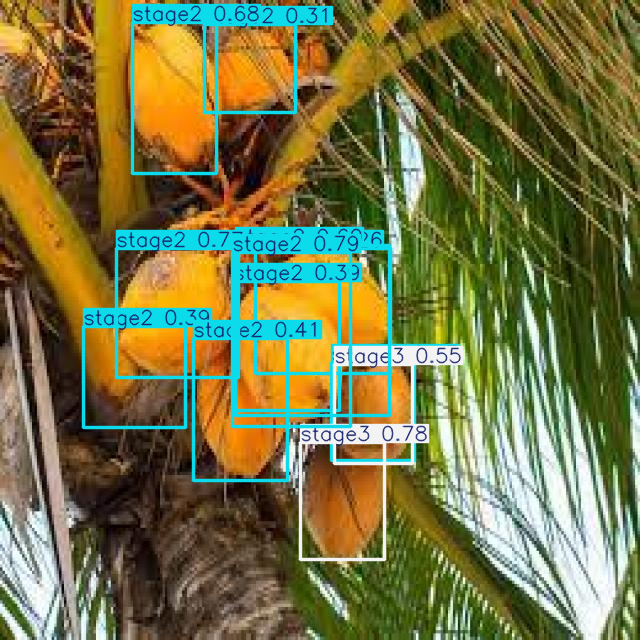

'output2.jpg'

In [ ]:
# Run inference on a test image
test_image_path = "/content/On-tree-mature-coconut-fruit-detection-1/test/images/00003_jpg.rf.685ee7b127bd0896095d95bc5b656151.jpg"
results = model(test_image_path)  # This returns a list of results

# Access the first result
result = results[0]

# Display the image with predictions
result.show()

# Save the output image with predictions
result.save("output2.jpg")


In [ ]:
# Save the trained model
model_path = "coconut_maturity_model_new.pt"
model.export(format="torchscript")  # You can also use 'onnx', 'coreml', or 'tflite' if needed
model.save(model_path)

print(f"Model saved as {model_path}")

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/coconut_maturity_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 1.9s, saved as 'runs/detect/coconut_maturity_model/weights/best.torchscript' (11.9 MB)

Export complete (3.5s)
Results saved to /content/runs/detect/coconut_maturity_model/weights
Predict:         yolo predict task=detect model=runs/detect/coconut_maturity_model/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/coconut_maturity_model/weights/best.torchscript imgsz=640 data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml  
Visualize:       https://netron.app
Model saved as coconut_maturity_model_new.pt


In [ ]:
# Real-time Coconut Detection Using Webcam
def detect_coconut_webcam(model):
    cap = cv2.VideoCapture(0)  # Open webcam
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        results = model(frame)
        result = results[0]
        annotated_frame = result.plot()

        cv2.imshow("Coconut Detection", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break

    cap.release()
    cv2.destroyAllWindows()

# Run webcam detection
detect_coconut_webcam(model)

Error: Could not open webcam.


In [ ]:
import sys
import subprocess

# Upgrade pip
subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])

# Install Hugging Face Hub
subprocess.run([sys.executable, "-m", "pip", "install", "huggingface_hub"])


CompletedProcess(args=['/usr/bin/python3', '-m', 'pip', 'install', 'huggingface_hub'], returncode=0)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()  # This will prompt you to enter your Hugging Face token

In [ ]:
from huggingface_hub import create_repo

repo_id = "Siva-67/coconut_maturity_model_new"  # Replace with your Hugging Face username/repo name
create_repo(repo_id, exist_ok=True)


RepoUrl('https://huggingface.co/Siva-67/coconut_maturity_model_new', endpoint='https://huggingface.co', repo_type='model', repo_id='Siva-67/coconut_maturity_model_new')

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
model_path = "coconut_maturity_model_new.pt"  # Replace with your actual model file

api.upload_file(
    path_or_fileobj=model_path,
    path_in_repo="coconut_maturity_model_new.pt",
    repo_id=repo_id
)

print("Model uploaded successfully!")


coconut_maturity_model_new.pt:   0%|          | 0.00/6.15M [00:00<?, ?B/s]

Model uploaded successfully!
